# A_f_data_bash_500 : 500 data points, that are generated by bash script in cluster (diff. in range and no. of points)

In [1]:
from os import walk
import numpy as np
import pickle
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)
plt.rcParams.update({'font.size': 7})

In [2]:
'''
f_name = "/coefficient.dat"
fo_name = "./oscillatory_bounday_condition/lhs_data_py/"
(_,  cases, _) = next(walk(fo_name))

data = {}
for case in cases:
    data[case] = np.loadtxt(fo_name + case + f_name, unpack=True, usecols=[0, 1, 3])
     
pickle.dump(data, open('data_py.config', 'wb'))
'''

'\nf_name = "/coefficient.dat"\nfo_name = "./oscillatory_bounday_condition/lhs_data_py/"\n(_,  cases, _) = next(walk(fo_name))\n\ndata = {}\nfor case in cases:\n    data[case] = np.loadtxt(fo_name + case + f_name, unpack=True, usecols=[0, 1, 3])\n     \npickle.dump(data, open(\'data_py.config\', \'wb\'))\n'

In [3]:
A = []
f = []
c_d = []
c_l = []
r_c_d = []
r_c_l = []
r = [] 
rs = []
rabs = []
rfs = []
with open(r"config.dictionary", "rb") as file:
    data = pickle.load(file)

## DATA

In [4]:
tml  = (np.abs(list(data.values())[0][0] - 4.0)).argmin()

for key in data.keys():
    first, sec = key.split("-")
    A.append(float(first[1:]))
    f.append(float(sec[1:]))
    r_c_d = data[key][1][tml:]
    r_c_l = data[key][1][tml:]
    r.append(np.mean((r_c_d**2 + r_c_l**2)**.5))
    rs.append(np.mean(r_c_d + r_c_l))
    c_d.append(np.mean(data[key][1][tml:]))
    c_l.append(np.mean(data[key][2][tml:]))
    rabs.append(np.mean(r_c_d + np.abs(r_c_l)))
    rfs.append(np.mean((r_c_d-r_c_d.min())/(r_c_d.max()-r_c_d.min()) + (r_c_l-r_c_l.min())/(r_c_l.max()-r_c_l.min())))
A = np.asarray(A)
f = np.asarray(f)
c_d = np.asarray(c_d)
c_l = np.asarray(c_l)
r = np.asarray(r)
rs = np.asarray(rs)

In [5]:
def plot_data(array, lim):
    fig, (ax1) = plt.subplots(1, 1, figsize=(7, 7))
    levels = np.linspace(lim[0], lim[1], 200)
    levels_line = np.linspace(lim[0], lim[1], 15)
    cntr2 = ax1.tricontourf(A, f, array, levels=levels, cmap="jet")
    ax1.tricontour(A, f, array, levels=levels_line)
    ax1.scatter(A, f, s=1, color ='k')
    ax1.set_xlabel("f")
    ax1.set_ylabel("A")
    fig.colorbar(cntr2, ax=ax1)
    plt.subplots_adjust(hspace=0.5)

## Plotting only Cd

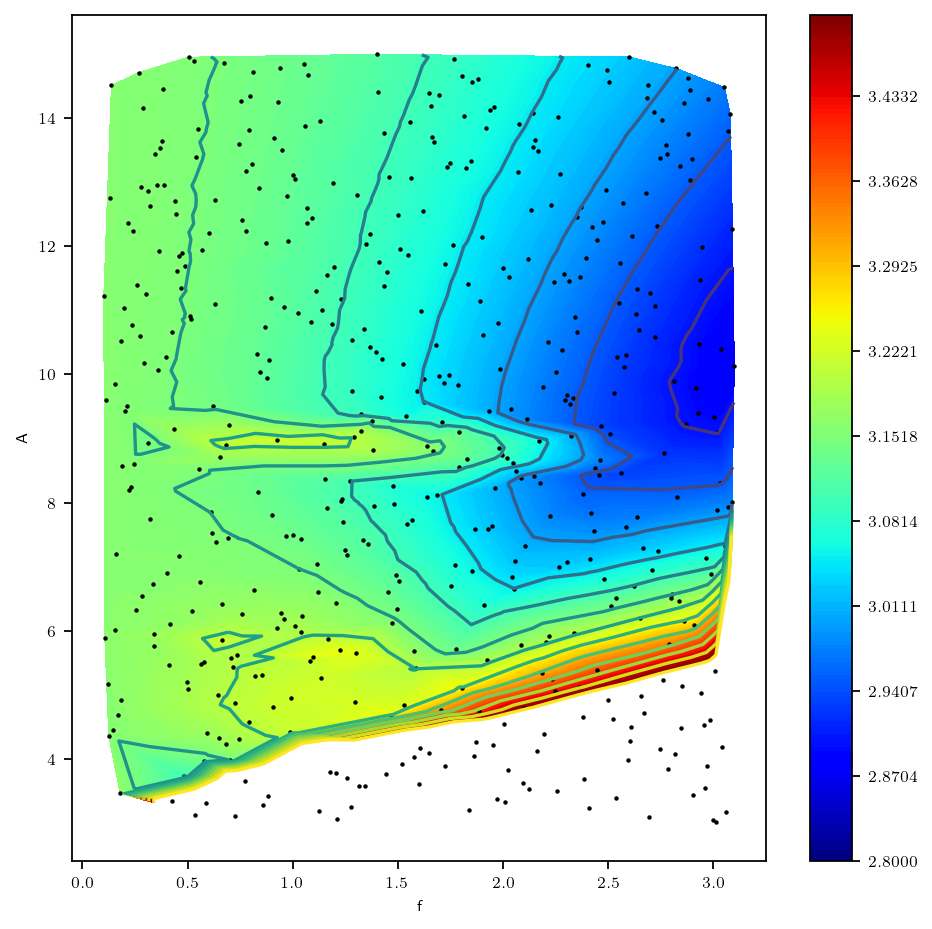

In [6]:
lim= [2.8,3.5]
plot_data(c_d, lim)

## Plotting only Cl

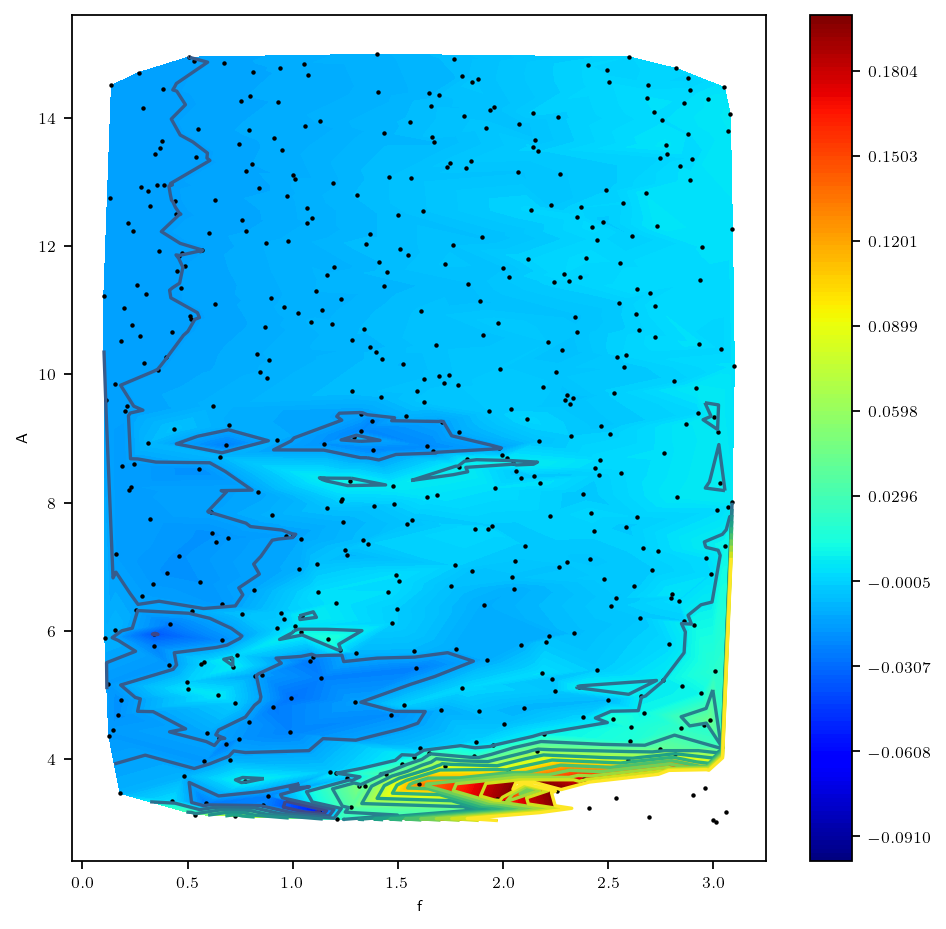

In [7]:
lim = [-0.1,0.2]
plot_data(c_l, lim)

## Plotting resultant of Cd and Cl
### As the values of Cl is very less and after square it become very small, which results in dominance of Cd in plot
Resultant calculated from the mean value of each case.



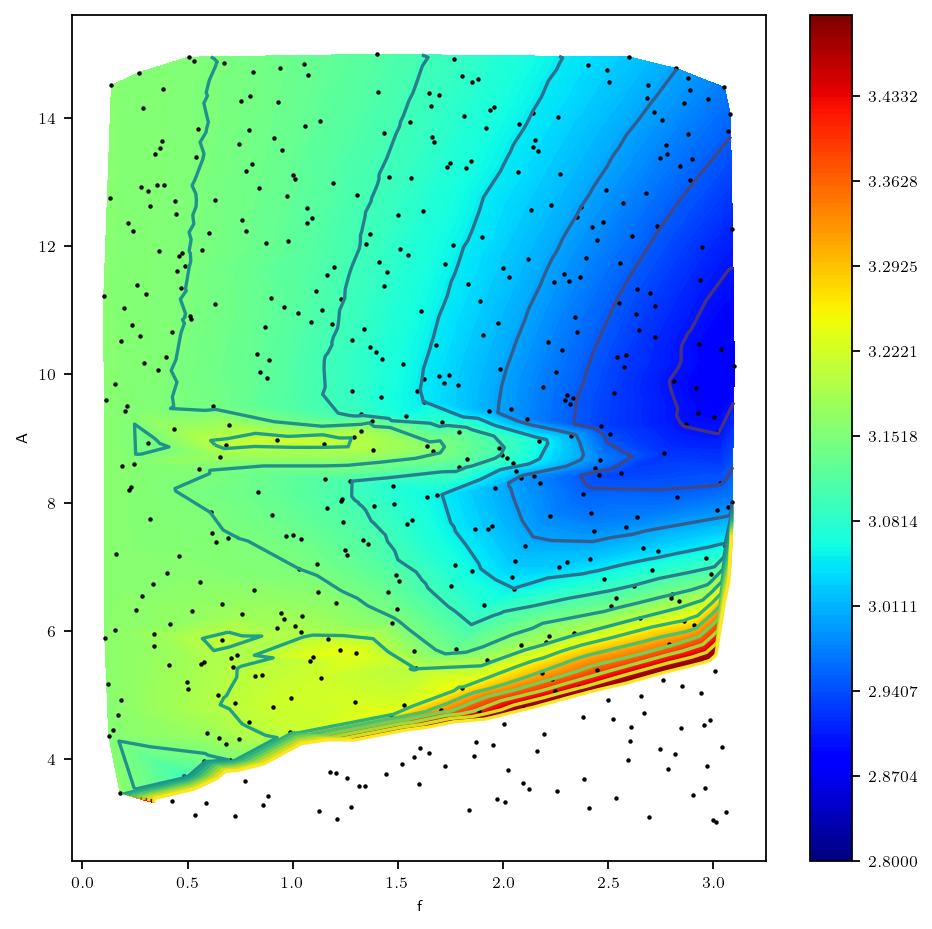

In [8]:
re = (c_d**2+c_l**2)**.5
lim = [2.8,3.5]
plot_data(re, lim)

## plotting resultant of Cd and Clx10
Resultant calculated from the mean value of each case and Cl is multplied with 10 as the values are very small. but also results in dominance of Cd

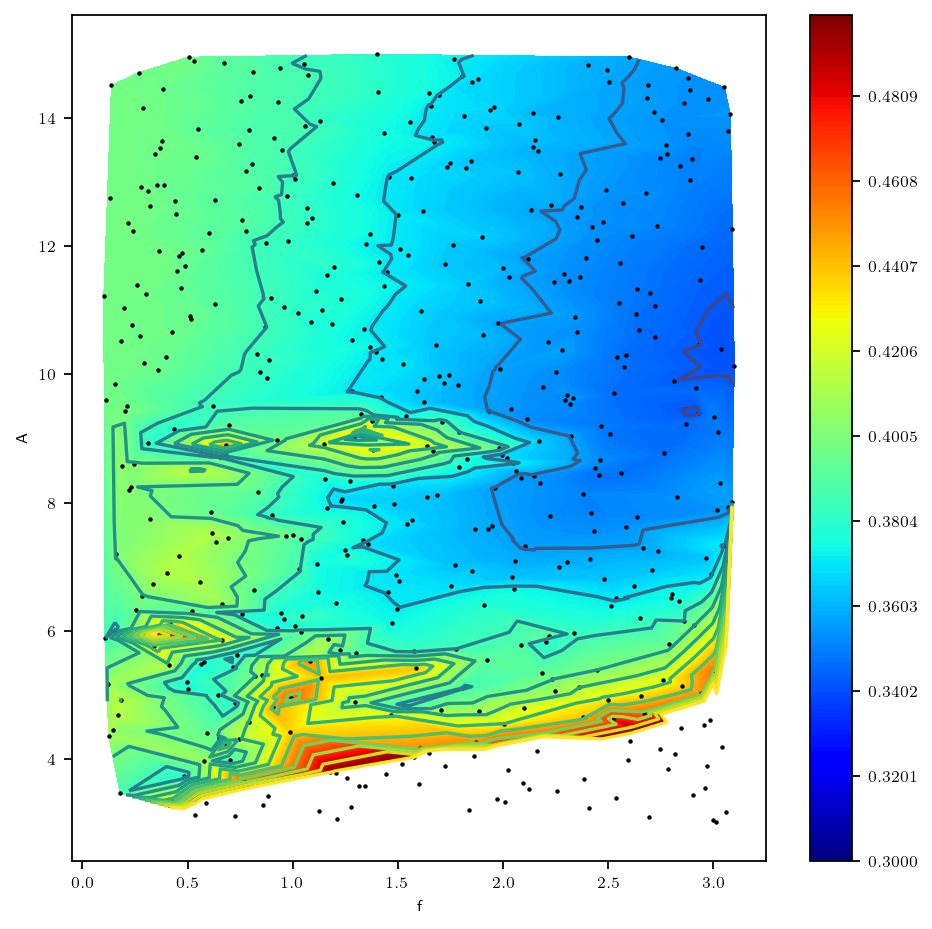

In [9]:
re_norm = ((c_d/c_d.max())**2 + ((c_l/c_l.max())*10)**2)**.5
lim = [0.3,0.5]
plot_data(re_norm,lim)

## Adding mean values of Cd and Cl

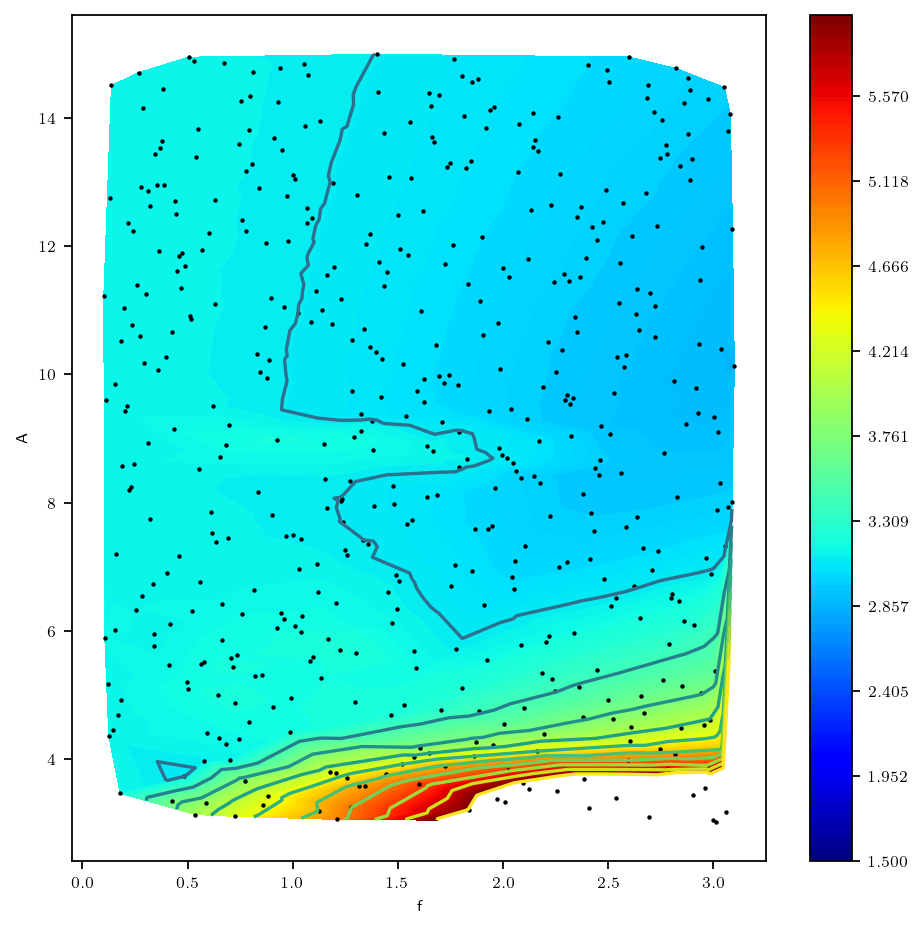

In [10]:
lim=[1.5,6]
plot_data((c_d+c_l),lim)

## Resultant of Cd and Cl at every time step and then the mean is calculated. See [DATA](https://github.com/darshan315/flow_past_cylinder_by_DRL/blob/master/notebooks/A_f_data.ipynb#DATA) above.

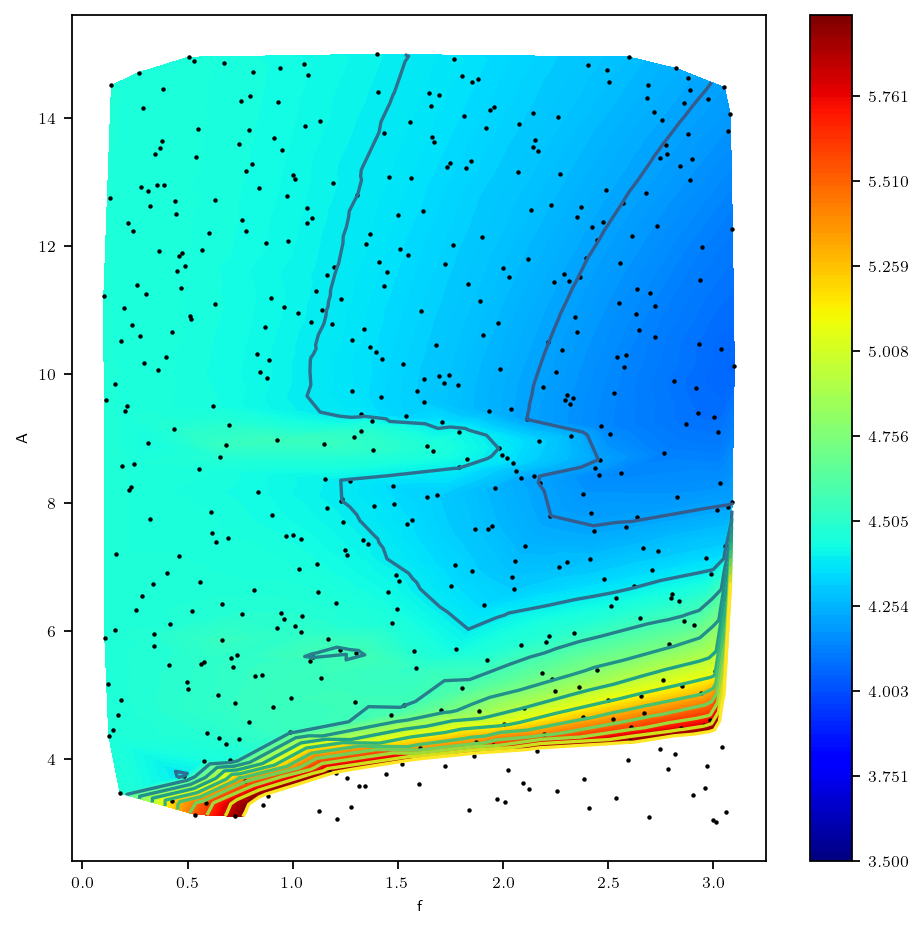

In [11]:
lim=[3.5,6]
plot_data(r,lim)

## Adding values of Cd and Cl at each time step and the mean is calculated. See [DATA](https://github.com/darshan315/flow_past_cylinder_by_DRL/blob/master/notebooks/A_f_data.ipynb#DATA) above.

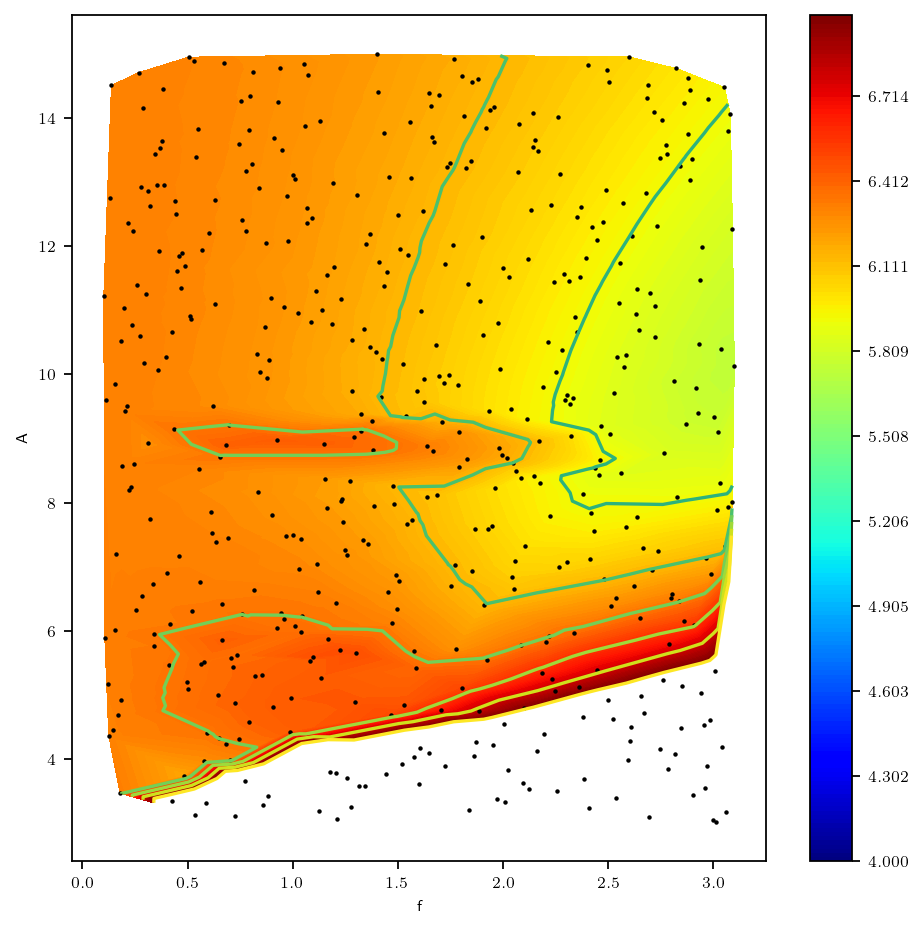

In [12]:
lim=[4,7]
plot_data(rs,lim)

## Feature scaling at every time. See [DATA](https://github.com/darshan315/flow_past_cylinder_by_DRL/blob/master/notebooks/A_f_data.ipynb#DATA) above.

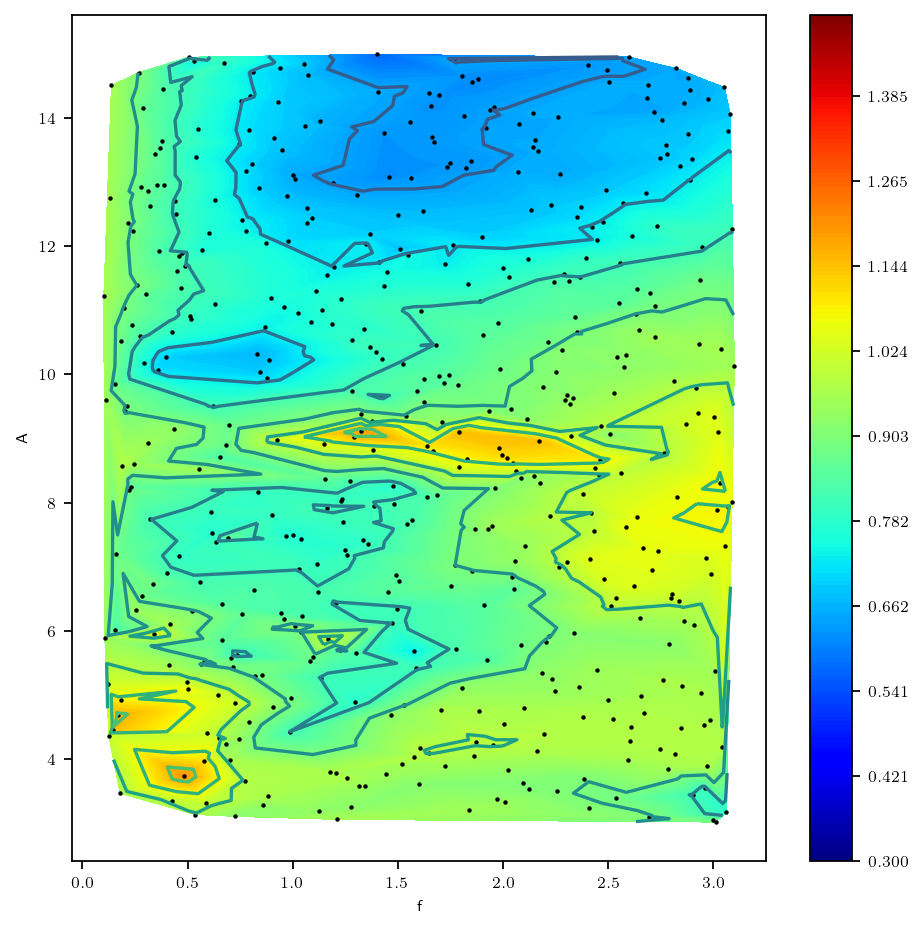

In [13]:
lim=[0.3,1.5]
plot_data(rfs,lim)

## Adding absulate values of Cl in Cd. See [DATA](https://github.com/darshan315/flow_past_cylinder_by_DRL/blob/master/notebooks/A_f_data.ipynb#DATA) above.

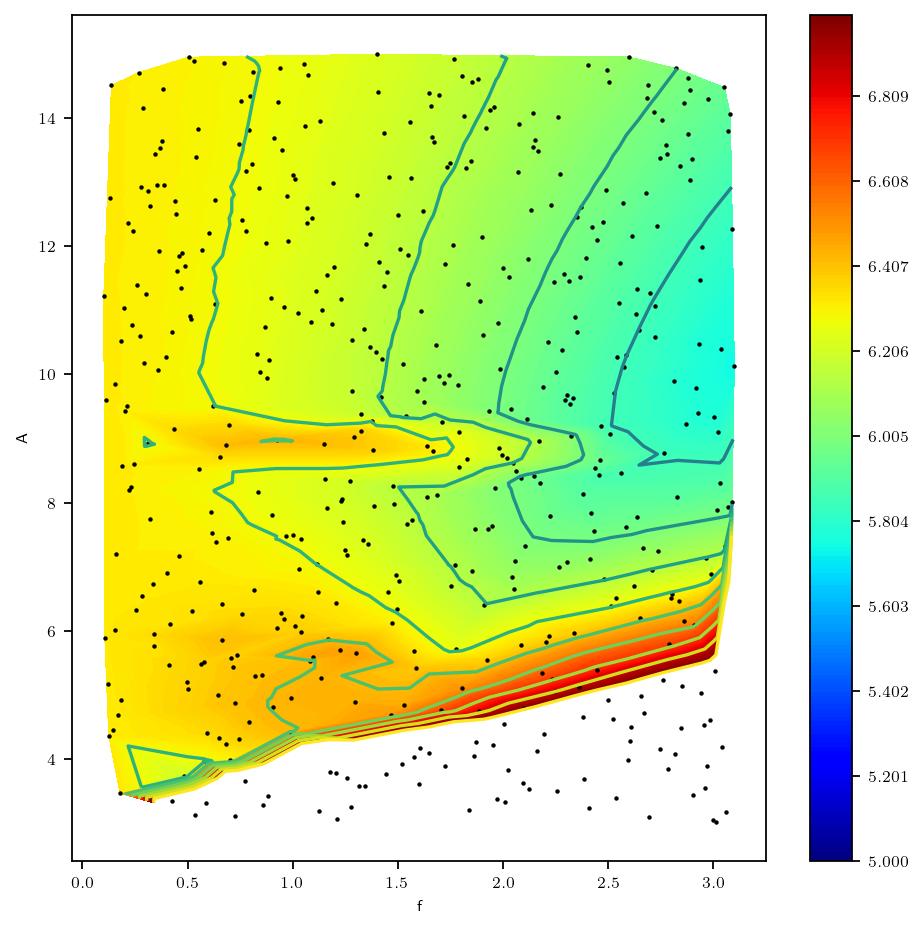

In [14]:
lim=[5,7]
plot_data(rabs,lim)